# Pipeline climate factors

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score

## Data Preprocessing

In [2]:
df_waterstress = pd.read_csv('clean data/water_stress.csv',index_col='Unnamed: 0')
df_climatefactors = pd.read_csv('clean data/climate_factors.csv',index_col='Unnamed: 0')
df_socioec_

### Merge

In [4]:
df_waterstress.set_index('Country',inplace=True)
df_climatefactors.set_index('Country',inplace=True)
df = pd.merge(df_waterstress,df_climatefactors,left_index=True,right_index=True)

KeyError: "None of ['Country'] are in the columns"

In [5]:
df.head()

,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG),Temperature (°C),Total Rainfall (mm),Total internal renewable water resources (IRWR),Total external renewable water resources (ERWR),Total renewable water resources,Dependency ratio,Total exploitable water resources
Country,,,,,,,,,,
AFG,31.045462,0.923778,54.757019,14.074742,353.323550,47.15,18.18,65.33,28.722600,NaN
AGO,0.475539,142.467836,1.871883,22.182196,958.376457,148.00,0.40,148.40,0.269542,NaN
ALB,3.933775,6.656907,7.139423,12.754647,1074.030807,26.90,3.30,30.20,10.927152,13.0
ARE,1708.000000,92.773763,1708.000000,28.010773,70.675403,0.15,0.00,0.15,0.000000,NaN
ARG,4.301333,13.616564,10.456664,14.767043,591.136700,292.00,584.24,876.24,66.675797,NaN


### Drop NAN's

In [6]:
df.isna().sum()

Water stress (MDG)                                   2
Water use efficiency (SDG)                          12
Water stress (SDG)                                   2
Temperature (°C)                                     2
Total Rainfall (mm)                                  2
Total internal renewable water resources (IRWR)      2
Total external renewable water resources (ERWR)      2
Total renewable water resources                      1
Dependency ratio                                     2
Total exploitable water resources                  116
dtype: int64

In [7]:
df.drop('Total exploitable water resources',axis=1,inplace=True)

In [8]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isna().sum()

Water stress (MDG)                                 0
Water use efficiency (SDG)                         0
Water stress (SDG)                                 0
Temperature (°C)                                   0
Total Rainfall (mm)                                0
Total internal renewable water resources (IRWR)    0
Total external renewable water resources (ERWR)    0
Total renewable water resources                    0
Dependency ratio                                   0
dtype: int64

## Make Pipeline

very simple for now, just to test the code

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:-1], df.iloc[:,0:3],random_state=0)

In [11]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
        ])

In [12]:
pipe = pipe.fit(X_train, y_train)

### Model score

In [15]:
X_train

,Temperature (°C),Total Rainfall (mm),Total internal renewable water resources (IRWR),Total external renewable water resources (ERWR),Total renewable water resources
Country,,,,,
NAM,21.485713,252.683377,6.160,33.750,39.910
DEU,9.999084,691.319867,107.000,47.000,154.000
BTN,12.309546,1856.180683,78.000,0.000,78.000
NPL,12.695257,1078.428387,198.200,12.000,210.200
THA,26.990641,1479.298980,224.510,214.100,438.610
...,...,...,...,...,...
AZE,12.938749,422.767387,8.115,26.560,34.675
MRT,28.672631,106.935637,0.400,11.000,11.400
IDN,26.519830,2719.088133,2018.700,0.000,2018.700


### Coefficients

In [13]:
pipe.steps[1][1].coef_

array([[  89.95684796, -116.69994847,   15.77229681,  -23.69805531,
           5.15117789],
       [ -36.54521341,    6.22101378,  -15.39284375,   12.33140859,
          -8.30499535],
       [  89.13444184, -118.60360753,   15.90402695,  -24.1744363 ,
           5.10966353]])

### Plot Model

In [14]:
y_model = pipe.predict(X_test)

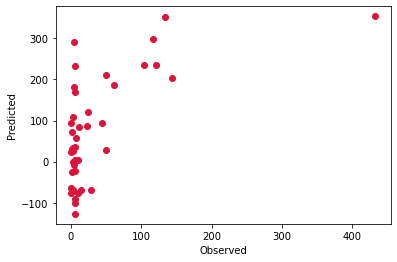

In [15]:
plt.scatter(y_test['Water stress (SDG)'], y_model[:,2], c='crimson')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

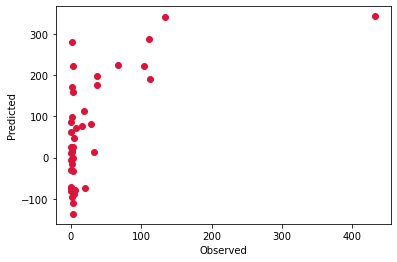

In [16]:
plt.scatter(y_test['Water stress (MDG)'], y_model[:,0], c='crimson')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

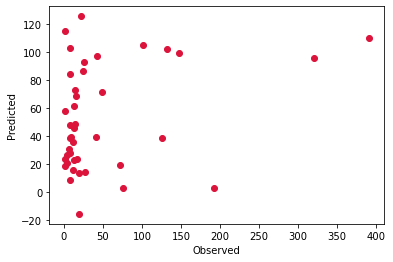

In [17]:
plt.scatter(y_test['Water use efficiency (SDG)'], y_model[:,1], c='crimson')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()